# P2 Evaluacion de factores e influencia de los mismos en MH

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor  # Example model
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
from sklearn.model_selection import train_test_split


path_mh = '/notebooks/MH_factores.csv'
path_gd = '/notebooks/GD_factores.csv'

df_mh = pd.read_csv(path_mh)
df_gd = pd.read_csv(path_gd)
display(df_mh)
display(df_gd)

num_clas= {'BCW':2, 'WQ':6, 'MNIST':10, 'FMNIST':10, 'CIFAR':10}



,Dataset,Complejidad,Tamaño,Modelo,Accuracy
0,BCW,1,1,1,0.970
1,BCW,1,1,1,0.932
2,BCW,1,1,2,0.890
3,BCW,1,1,4,0.903
4,WQ,2,2,1,0.201
5,WQ,2,2,1,0.167
6,WQ,2,2,2,0.167
7,WQ,2,2,4,0.167
8,MNIST,1,3,2,0.066
9,MNIST,1,3,3,0.115


,Dataset,Complejidad,Tamaño,Modelo,Accuracy
0,BCW,1,1,1,0.960
1,BCW,1,1,1,0.980
2,BCW,1,1,2,1.000
3,BCW,1,1,4,0.971
4,WQ,2,2,1,0.436
5,WQ,2,2,1,0.500
6,WQ,2,2,2,0.606
7,WQ,2,2,4,0.607
8,MNIST,1,3,2,0.977
9,MNIST,1,3,3,0.962


In [2]:
df_mh = df_mh.groupby(["Dataset", "Complejidad", "Tamaño", "Modelo"])["Accuracy"].mean().reset_index()
df_gd = df_gd.groupby(["Dataset", "Complejidad", "Tamaño", "Modelo"])["Accuracy"].mean().reset_index()

display(df_mh)
display(df_gd)

,Dataset,Complejidad,Tamaño,Modelo,Accuracy
0,BCW,1,1,1,0.88950
1,BCW,1,1,2,0.85750
2,BCW,1,1,4,0.70150
3,CIFAR,3,3,2,0.10800
4,CIFAR,3,3,3,0.10700
5,CIFAR,3,3,4,0.09950
6,FMNIST,2,3,2,0.27300
7,FMNIST,2,3,3,0.10200
8,FMNIST,2,3,4,0.10000
9,MNIST,1,3,2,0.11850


,Dataset,Complejidad,Tamaño,Modelo,Accuracy
0,BCW,1,1,1,0.97525
1,BCW,1,1,2,1.00000
2,BCW,1,1,4,0.97600
3,CIFAR,3,3,2,0.37950
4,CIFAR,3,3,3,0.37850
5,CIFAR,3,3,4,0.31800
6,FMNIST,2,3,2,0.85150
7,FMNIST,2,3,3,0.84200
8,FMNIST,2,3,4,0.78050
9,MNIST,1,3,2,0.97900


In [3]:
df_mh['Scaled_Accuracy'] = df_mh.apply(
    lambda row: (row['Accuracy'] - 1 / num_clas[row['Dataset']]) / (1 - 1 / num_clas[row['Dataset']]), 
    axis=1
)

df_gd['Scaled_Accuracy'] = df_gd.apply(
    lambda row: (row['Accuracy'] - 1 / num_clas[row['Dataset']]) / (1 - 1 / num_clas[row['Dataset']]), 
    axis=1
)

In [4]:
df_mh.to_csv('/notebooks/MH_factores2.csv', sep=',')
df_gd.to_csv('/notebooks/GD_factores2.csv', sep=',')
display(df_mh)
display(df_gd)

,Dataset,Complejidad,Tamaño,Modelo,Accuracy,Scaled_Accuracy
0,BCW,1,1,1,0.88950,0.779000
1,BCW,1,1,2,0.85750,0.715000
2,BCW,1,1,4,0.70150,0.403000
3,CIFAR,3,3,2,0.10800,0.008889
4,CIFAR,3,3,3,0.10700,0.007778
5,CIFAR,3,3,4,0.09950,-0.000556
6,FMNIST,2,3,2,0.27300,0.192222
7,FMNIST,2,3,3,0.10200,0.002222
8,FMNIST,2,3,4,0.10000,0.000000
9,MNIST,1,3,2,0.11850,0.020556


,Dataset,Complejidad,Tamaño,Modelo,Accuracy,Scaled_Accuracy
0,BCW,1,1,1,0.97525,0.950500
1,BCW,1,1,2,1.00000,1.000000
2,BCW,1,1,4,0.97600,0.952000
3,CIFAR,3,3,2,0.37950,0.310556
4,CIFAR,3,3,3,0.37850,0.309444
5,CIFAR,3,3,4,0.31800,0.242222
6,FMNIST,2,3,2,0.85150,0.835000
7,FMNIST,2,3,3,0.84200,0.824444
8,FMNIST,2,3,4,0.78050,0.756111
9,MNIST,1,3,2,0.97900,0.976667


In [5]:
##MH

X_mh = df_mh.drop(columns=['Dataset', 'Accuracy', 'Scaled_Accuracy'])
y_mh = df_mh['Scaled_Accuracy']

model_mh = RandomForestRegressor(random_state=42)
model_mh.fit(X_mh, y_mh)


##GD

X_gd = df_gd.drop(columns=['Dataset', 'Accuracy', 'Scaled_Accuracy'])
y_gd = df_gd['Scaled_Accuracy']

model_gd = RandomForestRegressor(random_state=42)
model_gd.fit(X_gd, y_gd)

RandomForestRegressor(random_state=42)

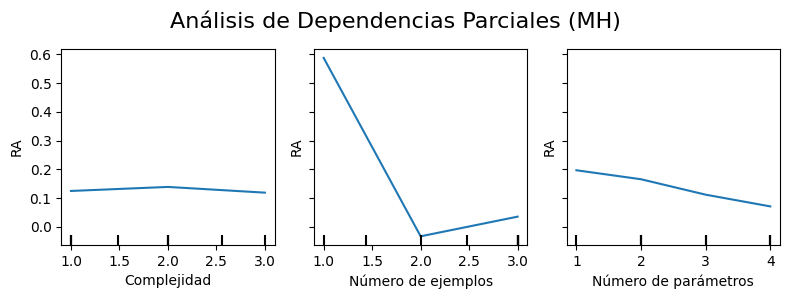

In [9]:

features = ['Complejidad', 'Tamaño', 'Modelo']  
nombres = ['Complejidad', 'Número de ejemplos', 'Número de parámetros']  
feature_indices = [X_mh.columns.get_loc(f) for f in features]


pdp_result = partial_dependence(model_mh, X_mh, feature_indices)


fig, axs = plt.subplots(1, 3, figsize=(8, 3), sharey=True)  
PartialDependenceDisplay.from_estimator(model_mh, X_mh, feature_indices, ax=axs)


plt.suptitle('Análisis de Dependencias Parciales (MH)', fontsize=16)


for ax in axs:
    ax.set_ylabel('RA')  # Remove default ylabel from individual subplots
    for line in ax.get_lines():
        line.set_antialiased(True)
        
for ax, nombre in zip(axs, nombres):
    ax.set_xlabel(nombre)


#fig.text(0.04, 0.5, 'Performance', va='center', rotation='vertical', fontsize=12)


plt.tight_layout()
plt.subplots_adjust(top=0.85) 

plt.savefig("pda.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

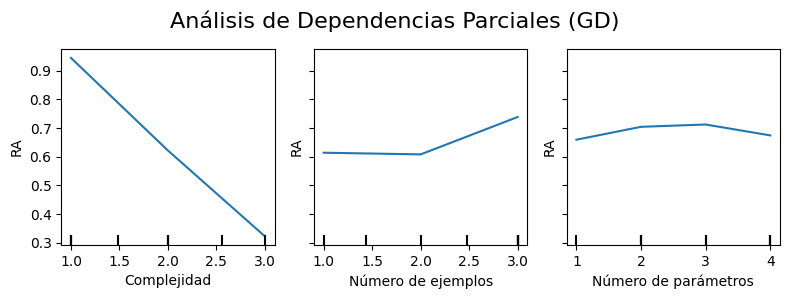

In [21]:

features = ['Complejidad', 'Tamaño', 'Modelo']  
nombres = ['Complejidad', 'Número de ejemplos', 'Número de parámetros']  
feature_indices = [X_mh.columns.get_loc(f) for f in features]


pdp_result = partial_dependence(model_gd, X_gd, feature_indices)



fig, axs = plt.subplots(1, 3, figsize=(8, 3), sharey=True)  
PartialDependenceDisplay.from_estimator(model_gd, X_gd, feature_indices, ax=axs)



plt.suptitle('Análisis de Dependencias Parciales (GD)', fontsize=16)


for ax in axs:
    ax.set_ylabel('RA')  
    for line in ax.get_lines():
        line.set_antialiased(True)

for ax, nombre in zip(axs, nombres):
    ax.set_xlabel(nombre)

#fig.text(0.04, 0.5, 'Performance', va='center', rotation='vertical', fontsize=12)


plt.tight_layout()
plt.subplots_adjust(top=0.85)  

plt.savefig("pda_gd.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

# P3 Análisis complejidad computacional

In [2]:
import copy
import pandas as pd
path_gd = '/notebooks/tiempos_rmsprop.csv'
path_mh = '/notebooks/tiempos_shade_ils.csv'

df_mh = pd.read_csv(path_mh)
df_gd = pd.read_csv(path_gd)
#display(df_mh)
#display(df_gd)

df = copy.copy(df_mh)
df.rename(columns={'Tiempo':'Tiempo MH'}, inplace=True)
df_gd.rename(columns={'Tiempo':'Tiempo GD'}, inplace=True)
df['Tiempo GD'] = df_gd['Tiempo GD']
df.to_csv('/notebooks/tiempos_conjuntos.csv')
display(df)

,Dataset,Tamaño Dataset,Modelo,Tamaño Modelo,Tiempo MH,Tiempo GD
0,BCW,569,1,2238,136.436,2.442
1,BCW,569,2,6462,147.795,2.448
2,BCW,569,5,85000,251.935,2.611
3,BCW,569,11,1400000,1791.067,3.103
4,BHP,506,1,2238,56.217,1.041
5,BHP,506,2,6462,61.645,1.005
6,BHP,506,5,85000,110.071,1.197
7,BHP,506,11,1400000,833.789,1.385
8,WQC,4898,1,2238,800.998,9.691
9,WQC,4898,2,6462,867.628,10.065


In [91]:
df_save = df.drop(columns=['Modelo'])
display(df_save)

,Dataset,Tamaño Dataset,Tamaño Modelo,Tiempo MH,Tiempo GD
0,BCW,569,2238,136.436,2.442
1,BCW,569,6462,147.795,2.448
2,BCW,569,85000,251.935,2.611
3,BCW,569,1400000,1791.067,3.103
4,BHP,506,2238,56.217,1.041
5,BHP,506,6462,61.645,1.005
6,BHP,506,85000,110.071,1.197
7,BHP,506,1400000,833.789,1.385
8,WQC,4898,2238,800.998,9.691
9,WQC,4898,6462,867.628,10.065


In [96]:
df['Proporcion'] = df['Tiempo MH']/df['Tiempo GD']
print(np.max(df['Proporcion']), np.argmax(df['Proporcion']))
print(np.min(df['Proporcion']), np.argmin(df['Proporcion']))


602.0137184115523 7
54.002881844380404 4


Estimated Big O complexity: O(t^0.90 * p^0.28)


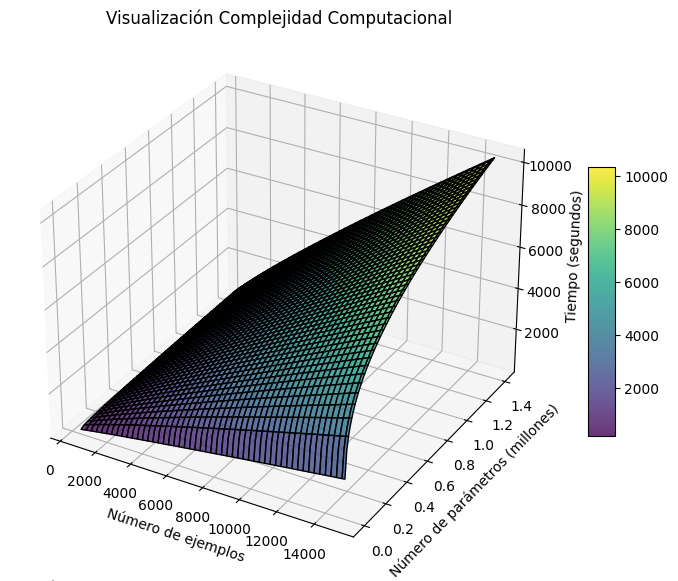

In [86]:
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Log-transform the data
df['log_time_mh'] = np.log(df['Tiempo MH'])
df['log_examples'] = np.log(df['Tamaño Dataset'])
df['log_parameters'] = np.log(df['Tamaño Modelo'])

# Prepare the feature matrix (X) and target vector (y)
X = df[['log_examples', 'log_parameters']]
y = df['log_time_mh']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Extract the coefficients a and b
a, b = model.coef_

# Print the results
print(f"Estimated Big O complexity: O(t^{a:.2f} * p^{b:.2f})")

# Generate a grid of examples and parameters
examples_range = np.linspace(df['Tamaño Dataset'].min(), df['Tamaño Dataset'].max(), 100)
parameters_range = np.linspace(df['Tamaño Modelo'].min(), df['Tamaño Modelo'].max(), 100)
examples_grid, parameters_grid = np.meshgrid(examples_range, parameters_range)

# Compute the estimated time based on the model
a, b = model.coef_
intercept = model.intercept_
estimated_time = np.exp(intercept) * (examples_grid ** a) * (parameters_grid ** b)

# Plot the 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surface = ax.plot_surface(
    examples_grid, 
    parameters_grid, 
    estimated_time, 
    cmap=cm.viridis, 
    edgecolor='k', 
    alpha=0.8
)

# Add labels and title
ax.set_xlabel('Número de ejemplos')
ax.set_ylabel('Número de parámetros (millones)')
ax.set_zlabel('Tiempo (segundos)')
ax.set_title('Visualización Complejidad Computacional')
fig.colorbar(surface, shrink=0.5, aspect=10)

plt.show()

Estimated Big O complexity: O(t^1.05 * p^0.10)


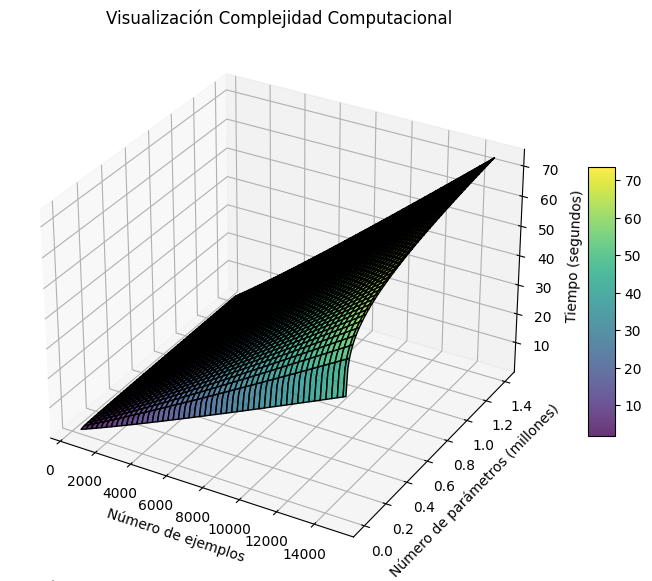

In [87]:
# Log-transform the data
df['log_time_gd'] = np.log(df['Tiempo GD'])
df['log_examples'] = np.log(df['Tamaño Dataset'])
df['log_parameters'] = np.log(df['Tamaño Modelo'])

# Prepare the feature matrix (X) and target vector (y)
X = df[['log_examples', 'log_parameters']]
y = df['log_time_gd']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Extract the coefficients a and b
a, b = model.coef_

# Print the results
print(f"Estimated Big O complexity: O(t^{a:.2f} * p^{b:.2f})")

# Generate a grid of examples and parameters
examples_range = np.linspace(df['Tamaño Dataset'].min(), df['Tamaño Dataset'].max(), 100)
parameters_range = np.linspace(df['Tamaño Modelo'].min(), df['Tamaño Modelo'].max(), 100)
examples_grid, parameters_grid = np.meshgrid(examples_range, parameters_range)

# Compute the estimated time based on the model
a, b = model.coef_
intercept = model.intercept_
estimated_time = np.exp(intercept) * (examples_grid ** a) * (parameters_grid ** b)

# Plot the 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surface = ax.plot_surface(
    examples_grid, 
    parameters_grid, 
    estimated_time, 
    cmap=cm.viridis, 
    edgecolor='k', 
    alpha=0.8
)

# Add labels and title
ax.set_xlabel('Número de ejemplos')
ax.set_ylabel('Número de parámetros (millones)')
ax.set_zlabel('Tiempo (segundos)')
ax.set_title('Visualización Complejidad Computacional')
fig.colorbar(surface, shrink=0.5, aspect=10)

plt.show()

Estimated Big O complexity: O(t^-0.15 * p^0.18)


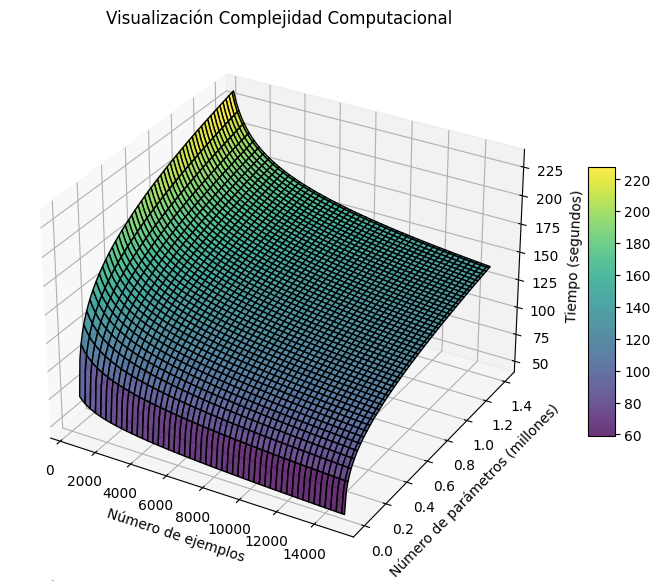

In [97]:
# Log-transform the data
df['log_prop'] = np.log(df['Proporcion'])
df['log_examples'] = np.log(df['Tamaño Dataset'])
df['log_parameters'] = np.log(df['Tamaño Modelo'])

# Prepare the feature matrix (X) and target vector (y)
X = df[['log_examples', 'log_parameters']]
y = df['log_prop']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Extract the coefficients a and b
a, b = model.coef_

# Print the results
print(f"Estimated Big O complexity: O(t^{a:.2f} * p^{b:.2f})")

# Generate a grid of examples and parameters
examples_range = np.linspace(df['Tamaño Dataset'].min(), df['Tamaño Dataset'].max(), 100)
parameters_range = np.linspace(df['Tamaño Modelo'].min(), df['Tamaño Modelo'].max(), 100)
examples_grid, parameters_grid = np.meshgrid(examples_range, parameters_range)

# Compute the estimated time based on the model
a, b = model.coef_
intercept = model.intercept_
estimated_time = np.exp(intercept) * (examples_grid ** a) * (parameters_grid ** b)

# Plot the 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surface = ax.plot_surface(
    examples_grid, 
    parameters_grid, 
    estimated_time, 
    cmap=cm.viridis, 
    edgecolor='k', 
    alpha=0.8
)

# Add labels and title
ax.set_xlabel('Número de ejemplos')
ax.set_ylabel('Número de parámetros (millones)')
ax.set_zlabel('Tiempo (segundos)')
ax.set_title('Visualización Complejidad Computacional')
fig.colorbar(surface, shrink=0.5, aspect=10)

plt.show()

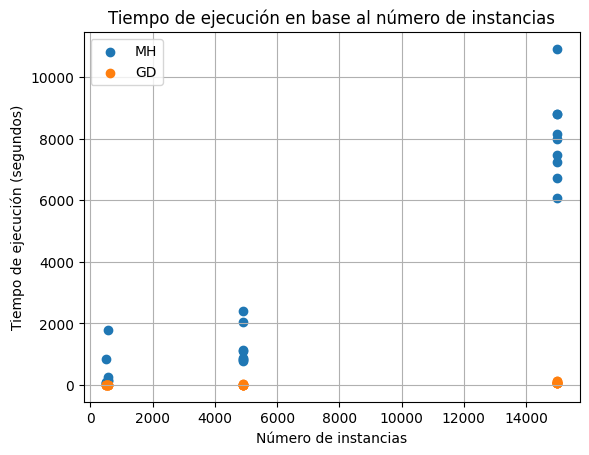

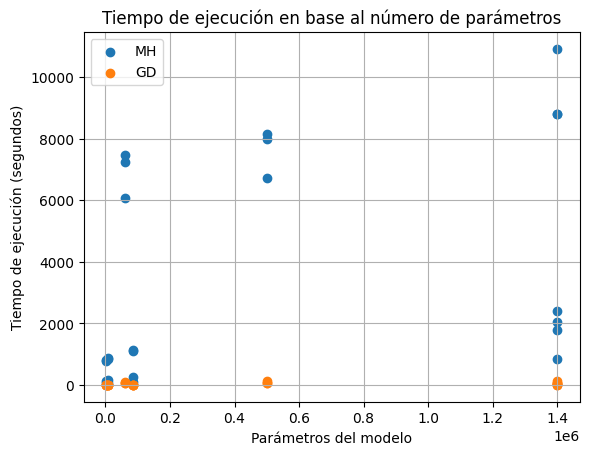

In [12]:
import matplotlib.pyplot as plt
#plt.plot(df['Tiempo MH'], label='MH')

plt.scatter(df['Tamaño Dataset'], df['Tiempo MH'], marker='o', label= "MH")
plt.scatter(df['Tamaño Dataset'], df['Tiempo GD'], marker='o', label= "GD")

plt.xlabel("Número de instancias")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.title("Tiempo de ejecución en base al número de instancias")
plt.legend()

plt.grid(True)
plt.show()


plt.scatter(df['Tamaño Modelo'], df['Tiempo MH'], marker='o', label= "MH")
plt.scatter(df['Tamaño Modelo'], df['Tiempo GD'], marker='o', label= "GD")

plt.xlabel("Parámetros del modelo")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.title("Tiempo de ejecución en base al número de parámetros")
plt.legend()

plt.grid(True)
plt.show()

# P1 Diferencias en tareas

In [12]:
import pandas as pd
from scipy import stats

# 1. Cargar los datos
df = pd.read_csv("table (1).csv")

# 2. Calcular la mejora relativa (%) de SHADE sobre ADAM
df['rel_diff'] = (df['metric_shade'] - df['metric_adam']) / df['metric_adam']

# 3. Agregar una columna que indique el tipo de tarea (clasificación o regresión)
df['task'] = df['Conjunto'].apply(lambda x: 'classification' if x in ['BCW', 'WQC'] else 'regression')

# 4. Emparejar correctamente los datos usando pivot.
# Se asume que el emparejamiento se hace por el número de capas (Columna 'Capas')
paired_data = df.pivot(index='Capas', columns='Conjunto', values='rel_diff')

display(paired_data)

# Extraer los valores emparejados según los conjuntos correspondientes:
# Para clasificación usamos BCW y WQC (se promedia) y para regresión, BHP y WQR.
classification_paired = paired_data[['BCW', 'WQC']].mean(axis=1)  # Promedio de las tareas de clasificación
regression_paired = paired_data[['BHP', 'WQR']].mean(axis=1)        # Promedio de las tareas de regresión

# Calcular el vector de diferencias (clasificación - regresión)
differences = classification_paired - regression_paired

# 5. Realizar el test de normalidad (Shapiro-Wilk) sobre las diferencias
normality_test = stats.shapiro(differences)
print("Test de normalidad (Shapiro-Wilk):")
print("W = {:.3f}, p-value = {:.3f}".format(normality_test.statistic, normality_test.pvalue))


Conjunto,BCW,BHP,WQC,WQR
Capas,,,,
1,0.010417,-0.270886,-0.538991,164.666667
2,-0.048980,-0.103365,-0.666000,-35.597222
5,-0.110000,-1.220779,-0.724422,-4166.898305
11,-0.070031,-115.189918,-0.724876,-597967.932331


Test de normalidad (Shapiro-Wilk):
W = 0.635, p-value = 0.002


In [19]:
import pandas as pd
from scipy import stats

# 1. Cargar los datos
df = pd.read_csv("table (1).csv")

# 2. Calcular la mejora relativa (%) de SHADE sobre ADAM
df['rel_diff'] = ((df['test_shade'] - df['train_shade']) - (df['test_adam'] - df['train_adam'])) / (df['test_adam'] - df['train_adam'])

# 3. Agregar una columna que indique el tipo de tarea (clasificación o regresión)
df['task'] = df['Conjunto'].apply(lambda x: 'classification' if x in ['BCW', 'WQC'] else 'regression')



# Emparejamiento Par 1: BCW y BHP
df_BCW = df[df['Conjunto'] == 'BCW'][['Capas', 'rel_diff']]
df_BHP = df[df['Conjunto'] == 'BHP'][['Capas', 'rel_diff']]
merged_pair1 = pd.merge(df_BCW, df_BHP, on='Capas', suffixes=('_class', '_reg'))

# Calcular la diferencia entre la mejora relativa de clasificación y la de regresión para el par 1
merged_pair1['diff'] = merged_pair1['rel_diff_class'] - merged_pair1['rel_diff_reg']

# Emparejamiento Par 2: WQC y WQR
df_WQC = df[df['Conjunto'] == 'WQC'][['Capas', 'rel_diff']]
df_WQR = df[df['Conjunto'] == 'WQR'][['Capas', 'rel_diff']]
merged_pair2 = pd.merge(df_WQC, df_WQR, on='Capas', suffixes=('_class', '_reg'))

# Calcular la diferencia para el par 2
merged_pair2['diff'] = merged_pair2['rel_diff_class'] - merged_pair2['rel_diff_reg']

# Combinar las diferencias de ambos emparejamientos
paired_differences = pd.concat([merged_pair1['diff'], merged_pair2['diff']])

# Aplicar el test de Wilcoxon signed-rank
w_stat, p_val_w = stats.wilcoxon(paired_differences)
print("\nWilcoxon signed-rank test (datos pareados):")
print("statistic = {:.3f}, p-value = {:.3f}".format(w_stat, p_val_w))



Wilcoxon signed-rank test (datos pareados):
statistic = 2.000, p-value = 0.023
